In [43]:
import numpy
from matplotlib import pyplot
import sympy

%matplotlib inline

In [44]:
pyplot.rc('font', family='serif', size=16)

In [45]:
sympy.init_printing()

In [46]:
x = sympy.symbols('x')

In [47]:
x

In [48]:
5*x

In [49]:
x, nu, t = sympy.symbols('x nu t')

In [50]:
nu

In [51]:
t

In [52]:
phi = (sympy.exp(-(x - 4 * t)**2 / (4 * nu * (t +1))) +
       sympy.exp(-(x - 4 * t - 2 * numpy.pi)**2 / (4 * nu * (t + 1))))
phi

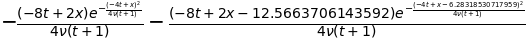

In [53]:
phiprime = phi.diff(x)
phiprime

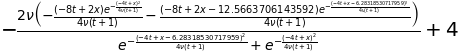

In [54]:
u = -2 * nu * phiprime / phi + 4
u

In [55]:
from sympy.utilities.lambdify import lambdify

In [56]:
u_lamb = lambdify((t, x, nu), u)

In [57]:
type(u_lamb)

function

In [58]:
u_lamb(1, 4, 3)

In [59]:
#Set parameters.
nx = 101
L = 2.0 * numpy.pi
dx = L / (nx - 1)

nu = 0.07

nt = 100
sigma = 0.1
dt = sigma * dx**2 / nu

In [60]:
x = numpy.linspace(0.0, L , num=nx)

In [61]:
#Set initial condition.
u0 = numpy.empty(nx)
for i, xi in enumerate(x):
    u0[i] = u_lamb(0.0, xi, nu)

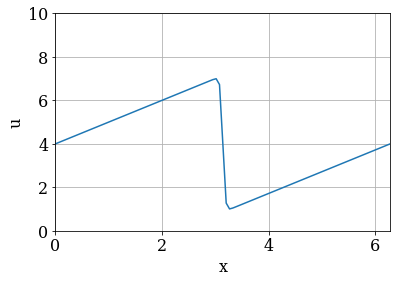

In [62]:
pyplot.figure()
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 10.0)

In [63]:
def burgers(u0, dx, dt, nu, nt=20):
    u_hist = [u0.copy()]
    u = u0.copy()
    for n in range(nt):
        un = u.copy()
        # Update all interior points.
        u[1:-1] = (un[1:-1] -
                   un[1:-1] * dt / dx * (un[1:-1] - un[:-2]) +
                   nu * dt / dx**2 * (un[:-2] - 2 * un[1:-1] + un[2:]))
        # Update the first point.
        u[0] = (un[0] -
                un[0] * dt / dx * (un[0] - un[-2]) +
                nu * dt / dx**2 * (un[-2] - 2 * un[0] + un[1]))
        # Update the last point.
        u[-1] = u[0]
        # Record the time-step solution.
        u_hist.append(u.copy())
    return u_hist

In [64]:
u_hist = burgers(u0, dx, dt, nu, nt=nt)

In [65]:
len(u_hist)

In [66]:
u_analytical = []
for n in range(nt + 1):
    ua = numpy.empty(nx)
    for i, xi in enumerate(x):
        ua[i] = u_lamb(n * dt, xi, nu)
    u_analytical.append(ua)

In [67]:
len(u_analytical)

In [68]:
def plot_solution(n, u_hist, u_analytical, x):
    pyplot.figure()
    pyplot.xlabel('x')
    pyplot.ylabel('u')
    pyplot.grid()
    pyplot.plot(x, u_hist[n], label='Numerical')
    pyplot.plot(x, u_analytical[n], label='Analytical')
    pyplot.legend()
    pyplot.xlim(0.0, 2.0 * numpy.pi)
    pyplot.ylim(0.0, 10.0)
    pyplot.show()

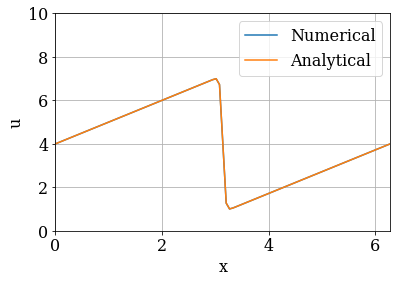

In [69]:
plot_solution(0, u_hist, u_analytical, x)

In [70]:
import ipywidgets

In [71]:
nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1, description='Time step')

w = ipywidgets.interactive(plot_solution, n=nt_slider, u_hist=ipywidgets.fixed(u_hist), u_analytical=ipywidgets.fixed(u_analytical), x=ipywidgets.fixed(x))

In [72]:
display(w)

interactive(children=(IntSlider(value=0, description='Time step'), Output()), _dom_classes=('widget-interact',…

In [76]:
def burgers_naive(u0, dx, dt, nu, nt=20):
    u_hist = [u0.copy()]
    u = u0.copy()
    for n in range(nt):
        un = u.copy()
        # Update all interior points.
        for i in range(1, nx - 1):
            u[i] = (un[i] -
                    un[i] * dt / dx * (un[i] - un[i - 1]) +
                    nu * dt / dx**2 * (un[i - 1] - 2 * un[i] + un[i + 1]))
        # Update the first point.
        u[0] = (un[0] -
                un[0] * dt / dx * (un[0] - un[-2]) +
                nu * dt / dx**2 * (un[-2] - 2 * un[0] + un[1]))
        # Update the last point.
        u[-1] = u[0]
        # Record the time-step solution.
        u_hist.append(u.copy())
    return u_hist

In [77]:
%%timeit
u_tmp = burgers(u0, dx, dt, nu, nt=1000)

16.9 ms ± 65.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [78]:
%%timeit
u_tem = burgers_naive(u0, dx, dt, nu, nt=1000)

312 ms ± 2.65 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
